<a href="https://colab.research.google.com/github/Rodo2005/redes_neuronales_python/blob/main/1_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [95]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [96]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [97]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('titanic.csv')
df.shape

(891, 12)

In [98]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_cop = df.copy()
df_cop = df_cop.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [100]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_nan = df_cop.isnull().any()
df_nan

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
dtype: bool

In [101]:
df_nan_total = df_cop[df_cop.Age.isnull()]
df_nan_total.shape[0]

177

In [102]:
df_cop.dropna(inplace=True)

In [103]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df_cop.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [104]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_cop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [105]:
df_cop['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

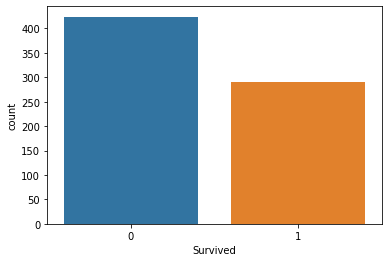

In [106]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
sns.countplot(data=df_cop, x='Survived')

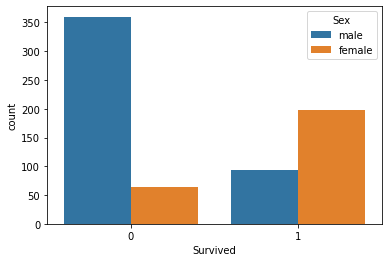

In [107]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df_cop, x='Survived', hue='Sex')

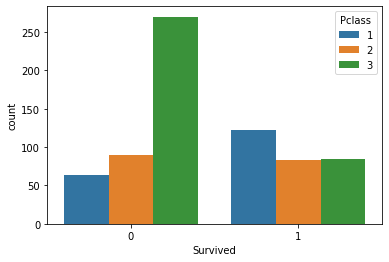

In [108]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(data=df_cop, x='Survived', hue='Pclass')

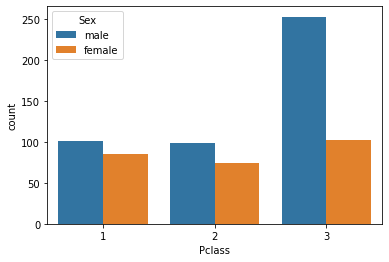

In [109]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df_cop, x='Pclass', hue='Sex')

#### Transformar variables categóricas texto a clases numeradas

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_cop.copy()
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [112]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()
df_cod['Sex'] = le.fit_transform(df_cod['Sex'])
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [113]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le.classes_

array(['female', 'male'], dtype=object)

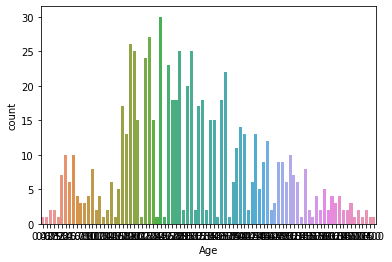

In [114]:
# Alumno: Analizar la distribución de la edad
sns.countplot(data=df_cod, x='Age')

In [115]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_norm = df_cod.copy()

In [116]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler
age_scaler = StandardScaler()
df_norm.loc[:, 'Age'] = age_scaler.fit_transform(df_norm[['Age']])
df_norm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [117]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X=df_norm.drop('Survived', axis=1).values
y=df_norm['Survived']

In [118]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape=X.shape[1]
in_shape

5

In [119]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape=1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [120]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
hidden_neurons=1
model=Sequential()
model.add(Dense(units=hidden_neurons, activation='sigmoid', input_shape=(in_shape,)))

In [122]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.007),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [123]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Utilizar un batch_size de 64
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=20, batch_size=64)

Epoch 1/20
8/8 [==============================] - 1s 32ms/step - loss: 0.5936 - accuracy: 0.7107 - val_loss: 0.6522 - val_accuracy: 0.6957
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 0.5693 - accuracy: 0.7259 - val_loss: 0.6451 - val_accuracy: 0.6870
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 0.5632 - accuracy: 0.7240 - val_loss: 0.6390 - val_accuracy: 0.6870
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 0.5370 - accuracy: 0.7462 - val_loss: 0.6302 - val_accuracy: 0.6870
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.5765 - accuracy: 0.7019 - val_loss: 0.6216 - val_accuracy: 0.6957
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 0.5522 - accuracy: 0.7363 - val_loss: 0.6158 - val_accuracy: 0.6783
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 0.5359 - accuracy: 0.7541 - val_loss: 0.6118 - val_accuracy: 0.6783
Epoch 8/20
8/8 [=================

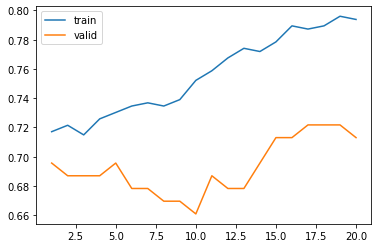

In [124]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()


In [125]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)

In [126]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = [1 if x>=0.5 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [127]:
# Alumno, calcular la exactitud (accuracy) de su modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.6923076923076923

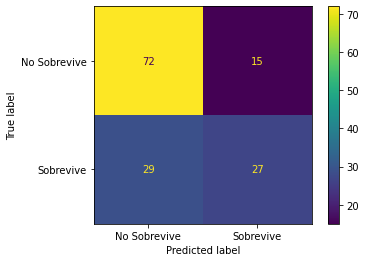

In [128]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Sobrevive', 'Sobrevive'])
cmd.plot()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [145]:
df_cop = df_cop.drop(columns=['Sobrevive'])
df_cop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [147]:
df_cop.shape

(714, 6)

In [148]:
df_cop.tail

<bound method NDFrame.tail of      Survived  Pclass     Sex   Age  SibSp  Parch
0           0       3    male  22.0      1      0
1           1       1  female  38.0      1      0
2           1       3  female  26.0      0      0
3           1       1  female  35.0      1      0
4           0       3    male  35.0      0      0
..        ...     ...     ...   ...    ...    ...
885         0       3  female  39.0      0      5
886         0       2    male  27.0      0      0
887         1       1  female  19.0      0      0
889         1       1    male  26.0      0      0
890         0       3    male  32.0      0      0

[714 rows x 6 columns]>

In [202]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo


df_sint = df_cop.copy()
df_sint = df_cop.drop(range(0, 891), axis=0, errors='ignore')
df_sint['Survived'] = np.random.randint(2, size=200)
df_sint['Pclass'] = np.random.randint(low=1, high=4, size=200, dtype=int)
sexo = (['male', 'female'])
df_sint['Sex'] = np.random.choice(sexo, size=200)
df_sint['Age'] = np.random.randint(low=18, high=60, size=200, dtype=int)
df_sint['SibSp'] = np.random.randint(2, size=200)
df_sint['Parch'] = np.random.randint(2, size=200)
df_sint.head()

#Se creo un df sintetico generado con funcion random y hacer todo el proceso como
#con la base de datos original.

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,1,male,22,0,0
1,1,1,male,41,0,0
2,0,1,male,40,0,1
3,0,2,female,53,1,1
4,1,2,male,40,1,0


In [203]:
df_sint_cod = df_sint.copy()
le = LabelEncoder()
df_sint_cod['Sex'] = le.fit_transform(df_sint_cod['Sex'])
df_sint_cod.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,1,1,22,0,0
1,1,1,1,41,0,0
2,0,1,1,40,0,1
3,0,2,0,53,1,1
4,1,2,1,40,1,0


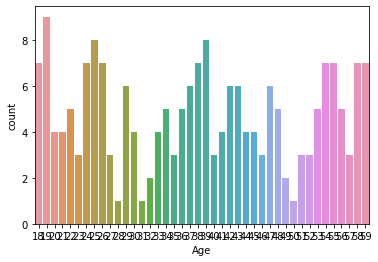

In [204]:
sns.countplot(data=df_sint_cod, x='Age')

In [205]:
df_sint_norm = df_sint_cod.copy()

In [206]:
from sklearn.preprocessing import StandardScaler
age_scaler = StandardScaler()
df_sint_norm.loc[:, 'Age'] = age_scaler.fit_transform(df_sint_norm[['Age']])
df_sint_norm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,1,1,-1.269466,0,0
1,1,1,1,0.219414,0,0
2,0,1,1,0.141052,0,1
3,0,2,0,1.159759,1,1
4,1,2,1,0.141052,1,0


In [207]:
X=df_sint_norm.drop('Survived', axis=1).values
y=df_sint_norm['Survived']

In [208]:
in_shape=X.shape[1]
out_shape=1

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
from keras.layers import Dense
hidden_neurons=1
model=Sequential()
model.add(Dense(units=hidden_neurons, activation='sigmoid', input_shape=(in_shape,)))

In [211]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.008),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [212]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=20, batch_size=64)

Epoch 1/20
2/2 [==============================] - 0s 187ms/step - loss: 0.8092 - accuracy: 0.5104 - val_loss: 0.7220 - val_accuracy: 0.5938
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.8310 - accuracy: 0.4896 - val_loss: 0.7145 - val_accuracy: 0.5625
Epoch 3/20
2/2 [==============================] - 0s 43ms/step - loss: 0.7792 - accuracy: 0.5365 - val_loss: 0.7084 - val_accuracy: 0.5625
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.7632 - accuracy: 0.5260 - val_loss: 0.7031 - val_accuracy: 0.5312
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.7697 - accuracy: 0.5052 - val_loss: 0.6989 - val_accuracy: 0.5312
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.7791 - accuracy: 0.4896 - val_loss: 0.6958 - val_accuracy: 0.5312
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.7626 - accuracy: 0.4688 - val_loss: 0.6936 - val_accuracy: 0.5312
Epoch 8/20
2/2 [==========

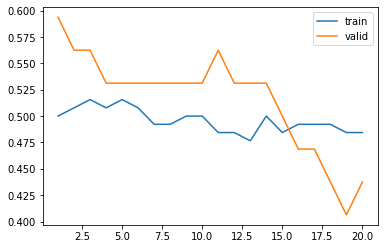

In [213]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [214]:
y_hat_prob = model.predict(X_test)

In [215]:
y_hat = [1 if x>=0.5 else 0 for x in y_hat_prob]

In [216]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.6

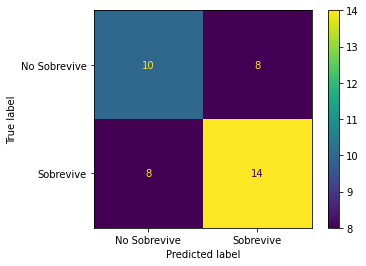

In [217]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Sobrevive', 'Sobrevive'])
cmd.plot()